In [2]:
import os
import numpy as np
import pandas as pd
import platform
import pickle
from pathlib import Path
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#%qtconsole

In [4]:
if platform.system() == 'Linux':
    data_dir = '/home/alin/Data/Recruit_Holding'
else:
    data_dir = 'C:/Users/alin/Documents/Data/Recruit_Holding'

## Load Data

In [5]:
air_reserve = pd.read_csv(data_dir + '/air_reserve.csv.zip')

air_store_info = pd.read_csv(data_dir + '/air_store_info.csv.zip')

air_visit_hist = pd.read_csv(data_dir + '/air_visit_data.csv.zip')

date_info = pd.read_csv(data_dir + '/date_info.csv.zip')

hpg_reserve = pd.read_csv(data_dir + '/hpg_reserve.csv.zip')

hpg_store_info = pd.read_csv(data_dir + '/hpg_store_info.csv.zip')

sample_submission = pd.read_csv(data_dir + '/sample_submission.csv.zip')

store_id_relation = pd.read_csv(data_dir + '/store_id_relation.csv.zip')

### date_info

Convert string to datetime.date and add day_index and month_index

In [6]:
day1 = datetime.strptime('2016-01-01', '%Y-%m-%d').date()

date_info['date'] = date_info.apply(lambda r: datetime.strptime(r['calendar_date'], '%Y-%m-%d').date(), axis=1)

date_info['day_ind'] = date_info.apply(lambda r: (r['date'] - day1).days, axis=1)

date_info['month_ind'] = date_info.apply(lambda r: r['date'].month - 1 if r['date'].year == 2016 else r['date'].month + 11, axis=1)

### aggregate air_reserve and hpg_reserve by date, append date related information to various datesets

In [7]:
air_reserve['visit_date_str'] = air_reserve.apply(lambda r: r['visit_datetime'][:10], axis=1)

hpg_reserve['visit_date_str'] = hpg_reserve.apply(lambda r: r['visit_datetime'][:10], axis=1)

air_reserve_day = air_reserve.groupby(['air_store_id', 'visit_date_str'], as_index=False).sum()[['air_store_id', 
                                                                                                'visit_date_str', 
                                                                                               'reserve_visitors']]

hpg_reserve_day = hpg_reserve.groupby(['hpg_store_id', 'visit_date_str'], as_index=False).sum()[['hpg_store_id', 
                                                                                                'visit_date_str', 
                                                                                               'reserve_visitors']]

air_reserve_day = air_reserve_day.merge(date_info, left_on='visit_date_str', right_on='calendar_date')

air_reserve_day.drop(['visit_date_str', 'calendar_date'], axis=1, inplace=True)

hpg_reserve_day = hpg_reserve_day.merge(date_info, left_on='visit_date_str', right_on='calendar_date')
hpg_reserve_day.drop(['visit_date_str', 'calendar_date'], axis=1, inplace=True)

air_visit_hist = air_visit_hist.merge(date_info, left_on='visit_date', right_on='calendar_date')

air_visit_hist.drop(['visit_date', 'calendar_date'], axis=1, inplace=True)

### Preprocess sample submission

In [8]:
sample_submission['store_id'] = sample_submission.apply(lambda r: r['id'][:-11], axis=1)

sample_submission['date_str'] = sample_submission.apply(lambda r: r['id'][-10:], axis=1) 

sample_submission = sample_submission.merge(date_info, left_on='date_str', right_on='calendar_date')

sample_submission.drop(['visitors', 'date_str', 'calendar_date'], axis=1, inplace=True)


### Add store information

In [9]:
air_reserve = air_reserve.merge(air_store_info, how='left', on='air_store_id')

air_reserve_day = air_reserve_day.merge(air_store_info, how='left', on='air_store_id')

hpg_reserve = hpg_reserve.merge(hpg_store_info, how='left', on='hpg_store_id')

hpg_reserve_day = hpg_reserve_day.merge(hpg_store_info, how='left', on='hpg_store_id')

air_visit_hist = air_visit_hist.merge(air_store_info, how='left', on='air_store_id')

sample_submission = sample_submission.merge(air_store_info, how='left', left_on='store_id', right_on='air_store_id')

test = sample_submission

### Add hpg_store_id to air_store data if possible

In [10]:
air_reserve = air_reserve.merge(store_id_relation, how='left', on='air_store_id')

air_reserve_day = air_reserve_day.merge(store_id_relation, how='left', on='air_store_id')

air_visit_hist = air_visit_hist.merge(store_id_relation, how='left', on='air_store_id')

### Save useful data frames to disk to save future loading time

In [13]:
DFS = {'air_reserve': air_reserve, 'air_reserve_day': air_reserve_day, 'hpg_reserve': hpg_reserve,
      'hpg_reserve_day': hpg_reserve_day, 'air_visit_hist': air_visit_hist, 'date_info': date_info,
      'test': test, 'air_store_info': air_store_info, 'hpg_store_info': hpg_store_info,
      'store_id_relation': store_id_relation}

pickle.dump(DFS, open(data_dir + '/DFS.p', 'wb'))

## Explore air_visit_hist

In [249]:
air_visit_hist.head(3)

,air_store_id,visitors,day_of_week,holiday_flg,date,day_ind,month_ind
0,air_ba937bf13d40fb24,25,Wednesday,0,2016-01-13,12,0
1,air_25e9888d30b386df,21,Wednesday,0,2016-01-13,12,0
2,air_fd6aac1043520e83,40,Wednesday,0,2016-01-13,12,0


In [ ]:
weekday = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
y_pos = np.arange(len(weekday))
def visit_by_store(store_id=None):
    store_visit = air_visit_hist[air_visit_hist.air_store_id == store_id]
    store_by_month = store_visit.groupby('month_ind', as_index=False).sum()[['month_ind', 'visitors']]
    store_by_weekday = store_visit.groupby('day_of_week', as_index=False).sum()[['day_of_week', 'visitors']]
    

In [255]:
a = air_visit_hist[air_visit_hist.air_store_id=='air_ba937bf13d40fb24']

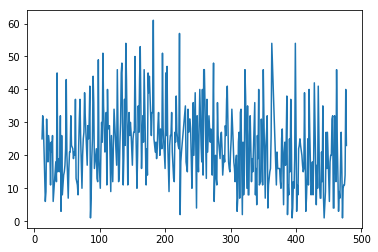

In [256]:
plt.plot(a['day_ind'], a['visitors'])

In [261]:
b = air_visit_hist.groupby(['air_store_id', 'month_ind'], as_index=False).sum()[['air_store_id', 'month_ind', 'visitors']]

In [263]:
c = b[b.air_store_id=='air_ba937bf13d40fb24']

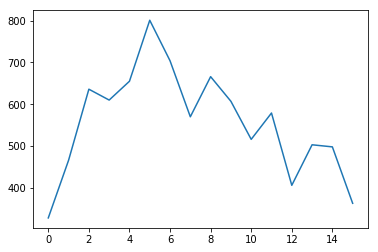

In [264]:
plt.plot(c['month_ind'], c['visitors'])

In [266]:
d = air_visit_hist.groupby(['air_store_id', 'day_of_week'], as_index=False).sum()[['air_store_id', 'day_of_week', 'visitors']]

In [271]:
e = d[d.air_store_id == 'air_ba937bf13d40fb24']

In [273]:
weekday = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
y_pos = np.arange(len(weekday))

In [290]:
performance = [e[e.day_of_week == wday].visitors.iloc[0] for wday in weekday]

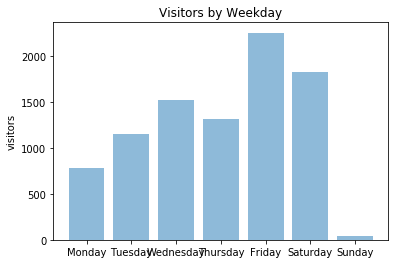

In [293]:
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, weekday)
plt.ylabel('visitors')
plt.title('Visitors by Weekday')
 


## air_reserve
This dataframe contains reservations made in the air system. Note that the reserve_datetime indicates the time when the reservation was created, whereas the visit_datetime is the time in the future where the visit will occur.

- air_store_id - the restaurant's id in the air system
- visit_datetime - the time of the reservation
- reserve_datetime - the time the reservation was made
- reserve_visitors - the number of visitors for that reservation

In [23]:
air_reserve.head(3)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6


In [24]:
air_reserve.shape

(92378, 4)

In [25]:
air_reserve.dtypes

air_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors     int64
dtype: object

In [26]:
air_reserve.isnull().sum(axis=0)

air_store_id        0
visit_datetime      0
reserve_datetime    0
reserve_visitors    0
dtype: int64

### (1) separate date from time, (2) further pull out year, month and day and hour

In [27]:
def process_date_time(df, prefix):
    '''create new fields prefix_date, prefix_hour, prefix_year, prefix_month, prefix_day from prefix_datetime'''
    df[prefix + '_date'] = df.apply(lambda r: r[prefix + '_datetime'][:10], axis=1)    
    df[prefix + '_year'] = df.apply(lambda r: int(r[prefix + '_datetime'][:4]), axis=1)
    df[prefix + '_month'] = df.apply(lambda r: int(r[prefix + '_datetime'][5:7]), axis=1)
    df[prefix + '_day'] = df.apply(lambda r: int(r[prefix + '_datetime'][8:10]), axis=1)
    df[prefix + '_hour'] = df.apply(lambda r: int(r[prefix + '_datetime'][11:13]), axis=1)
    return df
    

In [28]:
air_reserve = process_date_time(air_reserve, 'visit')
air_reserve = process_date_time(air_reserve, 'reserve')

In [29]:
air_reserve.head(3) 

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_date,visit_year,visit_month,visit_day,visit_hour,reserve_date,reserve_year,reserve_month,reserve_day,reserve_hour
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016-01-01,2016,1,1,19,2016-01-01,2016,1,1,16
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,2016-01-01,2016,1,1,19,2016-01-01,2016,1,1,19
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,2016-01-01,2016,1,1,19,2016-01-01,2016,1,1,19


### aggregate by visit_date

In [62]:
keep_col1 = ['air_store_id', 'visit_date', 'visit_year', 'visit_month', 'visit_day']
air_reserve_visit = air_reserve.groupby(keep_col1, as_index=False).sum()[keep_col1 + ['reserve_visitors']]

In [102]:
a = air_reserve_visit.merge(date_info, left_on='visit_date', right_on='calendar_date')

### append store info

In [87]:
air_reserve = air_reserve.merge(air_store_info, how='left')

### append weekday info

In [146]:
air_reserve = air_reserve.merge(date_info, how='left', left_on='visit_date', right_on='calendar_date')

In [152]:
air_reserve.drop(['visit_datetime', 'reserve_datetime', 'calendar_date'], axis=1, inplace=True)

In [153]:
air_reserve.head(3)

,air_store_id,reserve_visitors,visit_date,visit_year,visit_month,visit_day,visit_hour,reserve_date,reserve_year,reserve_month,reserve_day,reserve_hour,air_genre_name,air_area_name,latitude,longitude,day_of_week,holiday_flg
0,air_877f79706adbfb06,1,2016-01-01,2016,1,1,19,2016-01-01,2016,1,1,16,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Friday,1
1,air_db4b38ebe7a7ceff,3,2016-01-01,2016,1,1,19,2016-01-01,2016,1,1,19,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,Friday,1
2,air_db4b38ebe7a7ceff,6,2016-01-01,2016,1,1,19,2016-01-01,2016,1,1,19,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,Friday,1


### No missing data

In [154]:
air_reserve.isnull().sum(axis=0)

air_store_id        0
reserve_visitors    0
visit_date          0
visit_year          0
visit_month         0
visit_day           0
visit_hour          0
reserve_date        0
reserve_year        0
reserve_month       0
reserve_day         0
reserve_hour        0
air_genre_name      0
air_area_name       0
latitude            0
longitude           0
day_of_week         0
holiday_flg         0
dtype: int64

### Create some counts as potential features

In [183]:
air_mean_reserve = air_reserve.groupby('air_store_id', as_index=False).sum()[['air_store_id','reserve_visitors']]

In [184]:
total_days = np.unique(air_reserve.visit_date).shape[0]

In [185]:
air_mean_reserve['avg_daily_air_reserve_visitors'] = air_mean_reserve['reserve_visitors'] / total_days

In [187]:
air_mean_reserve.drop('reserve_visitors', axis=1, inplace=True)

In [190]:
air_mean_reserve_wkday = air_reserve.groupby(['air_store_id', 'day_of_week'], as_index=False).sum()[['air_store_id', 'day_of_week',
                                                                                                    'reserve_visitors']]

In [225]:
wkday = air_reserve[['visit_date', 'day_of_week']].drop_duplicates()

In [228]:
wkday_cnt = wkday.day_of_week.value_counts()

In [231]:
air_mean_reserve_wkday['avg_air_reserve_visitors_wkday'] = air_mean_reserve_wkday.apply(lambda r: r['reserve_visitors'] / 
                                                                                       wkday_cnt[r['day_of_week']], axis=1)

In [234]:
DFS = {'air_reserve': air_reserve, 'air_mean_reserve': air_mean_reserve, 'air_mean_reserve_wkday': air_mean_reserve_wkday}

pickle.dump(DFS, open(data_dir + '/DFS.p', 'wb'))